In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Don’t wrap columns

In [3]:
def find_substring(string):
    substring = string[string.find("_") + 1:string.find(".")]
    return substring

def rename_columns(df, cols, type):
    if type == "temperatura":
        label = "temp"
        new_cols = {}
        for col in cols[1:6]:  
            new_cols[col] = f"{label}_{col}"
        return df.rename(columns=new_cols)

    if type == "pluviometricas":
        label = "pluv"
        new_cols = {}
        for col in cols[1:6]:  
            new_cols[col] = f"{label}_{col}"
        return df.rename(columns=new_cols)

In [4]:
import os
path = ["cepea_acucar.xlsx", "cepea_boigordo.xlsx",
        'cepea_milho.xlsx', "cepea_soja.xlsx"]

base_path = os.path.join('vars', 'cepea_produção')

col_map = {'Data' : 'date'}
commodity_dfs = []

for i, file in enumerate(path):
    full_path = os.path.join(base_path, file)
    data = pd.read_excel(full_path, sheet_name="Plan 1", skiprows=3, decimal=',', engine="openpyxl")
    df = pd.DataFrame(data)
    
    col_date = df.columns[0]
    col_price = df.columns[1]
    
    df[col_date] = pd.to_datetime(df[col_date], errors='coerce')
    df = df.dropna(subset=[col_date])
    df[col_price] = df[col_price].astype(float)
    df[col_date] = df[col_date].dt.strftime('%m/%Y')
    df.set_index(col_date, inplace=True)
    
    commodity_name = find_substring(file)
    renamed_df = df[[col_price]].rename(columns={col_price: commodity_name})
    commodity_dfs.append(renamed_df)

commodity_dfs = pd.concat(commodity_dfs, axis=1)
commodity_dfs = commodity_dfs.rename_axis("date")

commodity_dfs.head()

#commodity_dfs.to_excel("cepea_prod.xlsx", index=True)


C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\188840314.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col_date] = pd.to_datetime(df[col_date], errors='coerce')
C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\188840314.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col_date] = pd.to_datetime(df[col_date], errors='coerce')
C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\188840314.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col_date] = pd.to_datetime(df[col_date], errors='coerce')
C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\18884031

,acucar,boigordo,milho,soja
date,,,,
05/2003,28.16,52.02,NaN,NaN
06/2003,25.09,52.69,NaN,NaN
07/2003,23.93,54.88,NaN,NaN
08/2003,29.41,57.09,NaN,NaN
09/2003,24.31,59.02,NaN,NaN


TEMP

In [27]:
path = "analise_anomalias_temperatura.xlsx"
type = find_substring(path)

base_path = os.path.join('vars', 'fatores_clima')
full_path = os.path.join(base_path, path)

data = pd.read_excel(path, sheet_name="Sheet1", decimal=',', engine="openpyxl")
df_t = pd.DataFrame(data)

col_date = df_t.columns[0]
df_t[col_date] = pd.to_datetime(df_t[col_date], errors='coerce')
df_t[col_date] = df_t[col_date].dt.strftime('%m/%Y')

df_t.set_index(col_date, inplace=True)

column_mapping = {
    'Date':'data',
    'N': 'temp_N',
    'NE': 'temp_NE', 
    'SE': 'temp_SE',
    'CO': 'temp_CO',
    'S': 'temp_S'
}

df_t = df_t.rename(columns=column_mapping)
df_t =df_t.drop(columns=["Ano", "Mês_Num", "Mês"])
df_t.index = pd.to_datetime(df_t.index, format='%m/%Y')
df_t = df_t[df_t.index.year >= 2007]
df_t = df_t.sort_index()
df_t.index = df_t.index.strftime('%m/%Y')

df_t.to_excel("dados_temp.xlsx")
df_t.head()


C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\2473919887.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t[col_date] = pd.to_datetime(df_t[col_date], errors='coerce')


,temp_N,temp_NE,temp_CO,temp_SE,temp_S
Date,,,,,
01/2007,0.927758,1.480966,0.603348,-0.023818,-0.010408
02/2007,0.441298,-0.589327,0.124886,-0.392885,0.158665
03/2007,0.152400,-0.203184,0.636525,0.816816,1.064644
04/2007,0.182649,0.143832,0.890932,0.656271,1.024391
05/2007,0.383846,-0.010711,0.759927,0.542976,0.392617


PLUV

In [28]:
path = "analise_anomalias_pluviometricas.xlsx"
type = find_substring(path)

base_path = os.path.join('vars', 'fatores_clima')
full_path = os.path.join(base_path, file)

data = pd.read_excel(path, sheet_name="Sheet1", decimal=',', engine="openpyxl")
df_p = pd.DataFrame(data)

col_date = df_p.columns[0]
df_p[col_date] = pd.to_datetime(df_p[col_date], errors='coerce')
df_p[col_date] = df_p[col_date].dt.strftime('%m/%Y')
df_p.set_index(col_date, inplace=True)

column_mapping = {
    'N': 'pluv_N',
    'NE': 'pluv_NE', 
    'SE': 'pluv_SE',
    'CO': 'pluv_CO',
    'S': 'pluv_S'
}

df_p = df_p.rename(columns=column_mapping)
df_p.index.name = 'date'
df_p =df_p.drop(columns=["Ano", "Mês_Num", "Mês"])
df_p.index = pd.to_datetime(df_p.index, format='%m/%Y')
df_p = df_p.sort_index()
df_p.index = df_p.index.strftime('%m/%Y')
df_p.head()

C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\3636901436.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_p[col_date] = pd.to_datetime(df_p[col_date], errors='coerce')


,pluv_N,pluv_NE,pluv_CO,pluv_SE,pluv_S
date,,,,,
01/2018,0.124646,-0.557614,-0.588379,-0.809082,-0.861975
02/2018,-0.774338,-0.854553,-0.404697,-0.792315,-0.860409
03/2018,-0.133397,-0.653857,-0.559018,-0.806163,-0.860409
04/2018,0.012240,-0.651751,-0.221015,-0.782951,-0.860409
05/2018,-0.183653,-0.655329,-0.279044,-0.785286,-0.860409


In [32]:
path = "analise_anomalias_pluviometricas_2.xlsx"
type = find_substring(path)

base_path = os.path.join('vars', 'fatores_clima')
full_path = os.path.join(base_path, file)

data = pd.read_excel(path, sheet_name="Sheet1", decimal=',', engine="openpyxl")
df_p2 = pd.DataFrame(data)

col_date = df_p2.columns[0]
df_p2[col_date] = pd.to_datetime(df_p2[col_date], errors='coerce')
df_p2[col_date] = df_p2[col_date].dt.strftime('%m/%Y')
df_p2.set_index(col_date, inplace=True)

column_mapping = {
    'N': 'pluv_N',
    'NE': 'pluv_NE', 
    'SE': 'pluv_SE',
    'CO': 'pluv_CO',
    'S': 'pluv_S'
}

df_p2 = df_p2.rename(columns=column_mapping)
df_p2.index.name = 'date'
df_p2 =df_p2.drop(columns=["Ano", "Mês_Num", "Mês"])
df_p2.index = pd.to_datetime(df_p2.index, format='%m/%Y')
df_p2 = df_p2.sort_index()
df_p2.index = df_p2.index.strftime('%m/%Y')
df_p2.head()

df_pluv = pd.concat([df_p2, df_p])

df_pluv.to_excel("dados_chuva.xlsx")

df_pluv.head()

C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\3187852486.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_p2[col_date] = pd.to_datetime(df_p2[col_date], errors='coerce')


,pluv_N,pluv_NE,pluv_CO,pluv_SE,pluv_S
date,,,,,
01/2007,3.612158,-38.926784,53.818512,93.810427,31.949040
02/2007,5.217448,142.624597,117.623727,22.782661,29.192588
03/2007,14.256466,-25.496332,-30.592528,-16.661007,52.456982
04/2007,28.421891,1.068417,-16.205812,15.840991,53.921244
05/2007,12.284670,4.698704,-4.524875,9.635437,66.404699


NIO OCEANIC INDEX

In [34]:
import os
path = "oceanic-nio-index-oni-me.xls.xlsx"

base_path = os.path.join('vars', 'fatores_clima')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, sheet_name="Ark1", skiprows=1, decimal=',', engine="openpyxl")
df_n = pd.DataFrame(data)

col_date = df_n.columns[0]
df_n[col_date] = pd.to_datetime(df_n[col_date], errors='coerce')
df_n = df_n[df_n[col_date].dt.year >= 2007]

df_n[col_date] = df_n[col_date].dt.strftime('%m/%Y')
df_n.set_index(col_date, inplace=True)

df_n =df_n.rename(columns={'índice' : 'nio_index'})
df_n.index.name = 'date'
df_n.index = pd.to_datetime(df_n.index, format='%m/%Y')
df_n = df_n.sort_index()
df_n.index = df_n.index.strftime('%m/%Y')
df_n.head()

,nio_index
date,
01/2007,0.71
02/2007,0.32
03/2007,-0.03
04/2007,-0.23
05/2007,-0.29


In [ ]:
list_df = [df_t, df_p, df_n]
df = pd.concat(list_df, axis=1)

df.head()

MACRO

In [36]:
import os

path = "cepea_dolar.xlsx"

base_path = os.path.join('vars', 'fatores_macro')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, sheet_name="Plan 1", skiprows=3, decimal=',', engine="openpyxl")
df_dol = pd.DataFrame(data)

col_date = df_dol.columns[0]
col_price = df_dol.columns[1]
    
df_dol[col_date] = pd.to_datetime(df_dol[col_date], errors='coerce')
df_dol = df_dol.dropna(subset=[col_date])
df_dol[col_price]=df_dol[col_price].astype(float)

df_dol[col_date] = df_dol[col_date].dt.strftime('%m/%Y')
df_dol.set_index(col_date, inplace=True)

column_mapping ={
    'data' : 'data',
    'À vista R$' : 'dolar'
}

df_dol = df_dol.rename(columns=column_mapping)
df_dol.index.name = 'date'
df_dol.head()

C:\Users\jvcha\AppData\Local\Temp\ipykernel_25388\1939923470.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dol[col_date] = pd.to_datetime(df_dol[col_date], errors='coerce')


,dolar
date,
10/2000,1.88
11/2000,1.95
12/2000,1.96
01/2001,1.96
02/2001,2.01


<Figure size 1200x600 with 0 Axes>

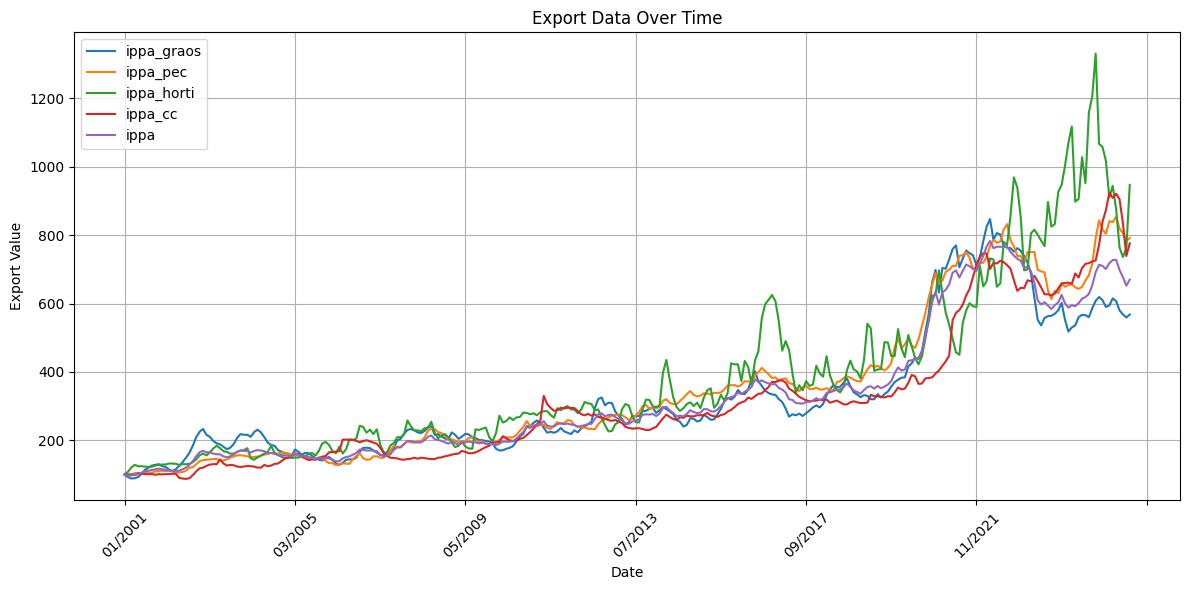

In [37]:
path = "cepea_ippa.xlsx"
base_path = os.path.join('vars', 'fatores_macro')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, sheet_name="Plan 1", skiprows=3, decimal=',', engine="openpyxl")
df_ippa = pd.DataFrame(data)

if 'Ano' in df_ippa.columns and 'Mês' in df_ippa.columns:
    df_ippa['Data'] = df_ippa['Mês'].astype(str).str.zfill(2) + '/' + df_ippa['Ano'].astype(str)
    df_ippa = df_ippa.drop(columns=['Mês', 'Ano'])

    cols = ['Data'] + [col for col in df_ippa.columns if col != 'Data']
    df_ippa = df_ippa[cols]

column_mapping = {
    'IPPA-Grãos/Cepea': 'ippa_graos',
    'IPPA-Pecuária/Cepea': 'ippa_pec', 
    'IPPA-Hortifrutícolas/Cepea': 'ippa_horti',
    'IPPA-CC/Cepea': 'ippa_cc',
    'IPPA/Cepea': 'ippa'
}

df_ippa = df_ippa.rename(columns=column_mapping)
df_ippa.set_index('Data', inplace=True)
df_ippa.index.name = 'date'
df_ippa.head()

plt.figure(figsize=(12, 6))
df_ippa.plot(kind='line', figsize=(12, 6))
plt.title('Export Data Over Time')
plt.xlabel('Date')
plt.ylabel('Export Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

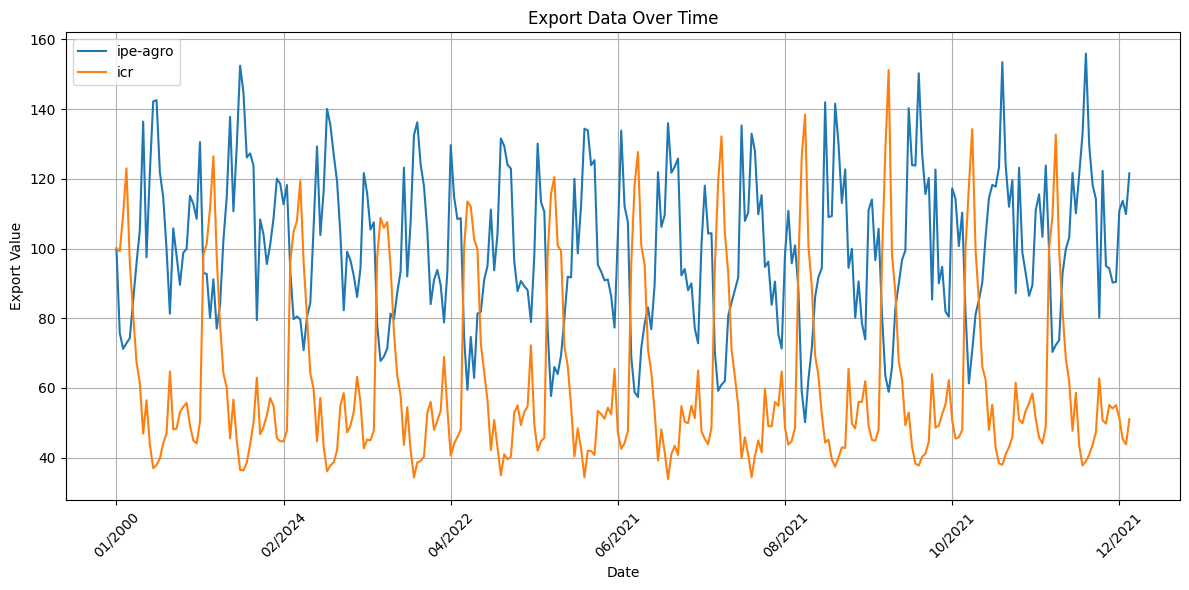

,ipe-agro,ive-agro,icr
date,,,
01/2000,100.00,100.00,100.00
01/2001,75.78,178.93,99.21
01/2002,71.22,161.24,109.66
01/2003,72.84,209.16,123.00
01/2004,74.31,241.60,96.04


In [39]:
path = "cepea_exportacao.xlsx"
base_path = os.path.join('vars', 'fatores_macro')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, decimal=',', engine="openpyxl")
df_exp = pd.DataFrame(data)

col_date = df_exp.columns[0]

df_exp[col_date] = pd.to_datetime(df_exp[col_date], errors='coerce')
df_exp[col_date] = df_exp[col_date].dt.strftime('%m/%Y')

df_exp.set_index(col_date, inplace=True)  
df_exp.index.name = 'date'  

df_exp = df_exp.drop(columns="iper-agro")


df_exp =df_exp.sort_index()
# Plot the export data
plt.figure(figsize=(12, 6))
df_exp.drop(columns=['ive-agro']).plot(kind='line', figsize=(12, 6))
plt.title('Export Data Over Time')
plt.xlabel('Date')
plt.ylabel('Export Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the dataframe head
df_exp.head()

<Figure size 1200x600 with 0 Axes>

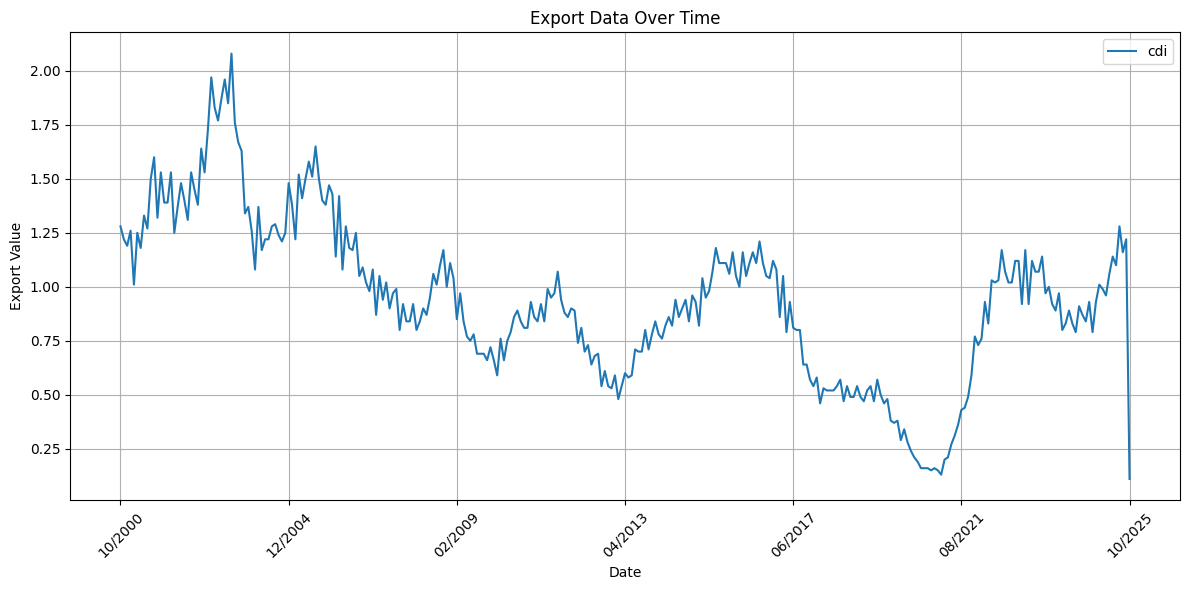

In [40]:
path = "cdi_bcb.xlsx"

base_path = os.path.join('vars', 'fatores_macro')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, decimal=',', engine="openpyxl")
df_cdi = pd.DataFrame(data)

df_cdi = pd.DataFrame(data)

col_date = df_cdi.columns[0]

df_cdi[col_date] = pd.to_datetime(df_cdi[col_date], errors='coerce')
df_cdi[col_date] = df_cdi[col_date].dt.strftime('%m/%Y')

df_cdi.set_index(col_date, inplace=True)  
df_cdi.index.name = 'date'  

df_cdi.head()

plt.figure(figsize=(12, 6))
df_cdi.plot(kind='line', figsize=(12, 6))
plt.title('Export Data Over Time')
plt.xlabel('Date')
plt.ylabel('Export Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

RISCO BRASIL

In [45]:
path = "risco_br.xlsx"

base_path = os.path.join('vars', 'fatores_macro')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, decimal=',', engine="openpyxl")
df_rbr = pd.DataFrame(data)

col_date = df_rbr.columns[0]

# First, let's see what the actual date format looks like
print(f"Sample dates from file: {df_rbr[col_date].head()}")
print(f"Date column dtype: {df_rbr[col_date].dtype}")

# If dates are already datetime, just convert to string
if pd.api.types.is_datetime64_any_dtype(df_rbr[col_date]):
    df_rbr[col_date] = df_rbr[col_date].dt.strftime('%m/%Y')
else:
    # Try parsing with dayfirst=True for dd.mm.yy format
    df_rbr[col_date] = pd.to_datetime(df_rbr[col_date], dayfirst=True, errors='coerce')
    df_rbr = df_rbr.dropna(subset=[col_date])
    df_rbr[col_date] = df_rbr[col_date].dt.strftime('%m/%Y')

print(f"\nAfter conversion: {df_rbr[col_date].head()}")

# Aggregate duplicates (multiple days in same month)
numeric_cols = df_rbr.select_dtypes(include=[np.number]).columns.tolist()
df_rbr = df_rbr.groupby(col_date, as_index=False)[numeric_cols].mean()

# Set index
df_rbr.set_index(col_date, inplace=True)  
df_rbr.index.name = 'date'  

# Sort by converting to datetime temporarily for proper sorting
df_rbr.index = pd.to_datetime(df_rbr.index, format='%m/%Y')
df_rbr = df_rbr.sort_index()
df_rbr.index = df_rbr.index.strftime('%m/%Y')

# Verify
print(f"\nFinal DataFrame shape: {df_rbr.shape}")
print(f"Duplicate indices: {df_rbr.index.duplicated().sum()}")

df_rbr.head()

Sample dates from file: 0    01.10.2025
1    01.09.2025
2    01.08.2025
3    01.07.2025
4    01.06.2025
Name: date, dtype: object
Date column dtype: object

After conversion: 0    10/2025
1    09/2025
2    08/2025
3    07/2025
4    06/2025
Name: date, dtype: object

Final DataFrame shape: (213, 1)
Duplicate indices: 0


,riscobr
date,
02/2008,0.3109
03/2008,0.1753
04/2008,-0.3152
05/2008,0.0000
06/2008,0.0000


In [57]:
list1=[df_exp, df_cdi, df_dol, df_ippa, df_rbr]
df1=pd.concat(list1, axis=1)

df1 = df1.drop_duplicates()
df1.head()

,ipe-agro,ive-agro,icr,cdi,dolar,ippa_graos,ippa_pec,ippa_horti,ippa_cc,ippa,riscobr
date,,,,,,,,,,,
01/2000,100.00,100.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/2001,75.78,178.93,99.21,1.26,1.96,100.0,100.0,100.0,100.0,100.0,NaN
01/2002,71.22,161.24,109.66,1.53,2.38,122.0,110.0,129.0,101.0,114.0,NaN
01/2003,72.84,209.16,123.00,1.97,3.44,216.0,143.0,156.0,125.0,165.0,NaN
01/2004,74.31,241.60,96.04,1.26,2.85,216.0,153.0,177.0,125.0,169.0,NaN


In [58]:
def find_substring_new(string):
    substring = string[string.find("(") + 1:string.find(")")]
    return substring

path  = "retorno_tickers.xlsx"

base_path = os.path.join('vars', 'fatores_macro')
full_path = os.path.join(base_path, path)

data = pd.read_excel(full_path, decimal=',', engine="openpyxl")
df_ticker = pd.DataFrame(data)

new_column_names = {}
for col in df_ticker.columns:
    if "(" in col and ")" in col:
        new_name = find_substring_new(col)
        new_column_names[col] = new_name

df_ticker = df_ticker.rename(columns=new_column_names)

col_date = df_ticker.columns[0]

df_ticker[col_date] = pd.to_datetime(df_ticker[col_date], errors='coerce')
df_ticker[col_date] = df_ticker[col_date].dt.strftime('%m/%Y')

df_ticker.set_index('date', inplace=True)
df_ticker.index.name = 'date'

df_ticker.head()

,MNPR3,ABEV3,BAUH4,JOPA4,MDIA3,MTSA4,SMTO3,RANI3,MSPA4,SUZB3,CSAN3,KEPL3,RAPT4,TUPY3,WLMM4,LUXM4,FHER3,DXCO3,EUCA4,AGRO3,SLCE3,BRFS3,MRFG3,BEEF3,CEDO4,CTNM4,DOHL4,CTKA4,PTNT4,SNSY5,CTSA4,SGPS3,TXRX4,CGRA4,PCAR3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02/2008,16.149072,13.274261,-2.494324,-6.666665,10.077460,4.081656,9.195420,42.424274,0.000000,0.0,7.037018,-5.128238,9.589044,21.027451,14.356883,-3.750046,19.166672,18.131883,-5.320578,13.000003,23.809529,4.499248,16.197191,8.974338,-0.029847,20.886081,8.938554,12.632176,0.724619,17.499995,-4.878043,-3.030311,-8.064516,1.529599,0.000000
03/2008,-1.069519,-9.382787,10.116263,3.571438,-17.840323,-3.921590,-11.228052,-25.531906,-3.226147,0.0,-11.418675,-5.405385,-16.875001,-3.791725,-0.990099,-5.194853,-12.138526,-6.976766,-14.985594,-2.212400,-1.961562,-2.943299,6.060626,-6.470577,13.466703,-9.214660,-1.282067,-3.061532,0.000000,17.021281,2.564099,-1.562495,5.263161,-7.405233,0.000000
04/2008,26.162155,-2.872089,-30.200624,17.807077,35.941056,0.000000,2.766790,5.714260,-11.101240,0.0,16.796860,8.571425,11.278225,8.882307,3.999990,0.000000,27.727508,6.999996,-1.694922,-2.262435,23.185605,14.979549,10.857139,23.899370,-8.026323,-12.341412,2.571444,-1.147493,-1.870490,9.090909,-20.000006,-12.380959,-11.666663,-14.956243,0.000000
05/2008,-14.224506,-5.495522,-4.235997,5.852935,8.510667,3.673485,-5.769253,-18.823341,-5.012497,0.0,-14.381260,5.263193,21.621572,12.452021,26.923089,0.000000,-2.125001,7.943963,3.448283,15.740753,0.318444,16.262296,21.649451,14.213211,0.000000,5.263158,-1.494053,0.106497,-12.096757,-7.499997,50.000000,8.695657,13.207543,5.960305,3.741182


In [59]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Don’t wrap columns

In [60]:
path = "unificado.xlsx"

# Read all three sheets
df_clima_unified = pd.read_excel(path, sheet_name="clima2", decimal=',', engine="openpyxl")
df_macro_unified = pd.read_excel(path, sheet_name="macro", decimal=',', engine="openpyxl")
df_cepea_unified = pd.read_excel(path, sheet_name="cepea", decimal=',', engine="openpyxl")

# Process each sheet
for df in [df_clima_unified, df_macro_unified, df_cepea_unified]:
    col_date = df.columns[0]
    df[col_date] = pd.to_datetime(df[col_date], format='%m/%Y', errors='coerce')
    df.set_index(col_date, inplace=True)
    df.index.name = 'date'

# Concatenate all sheets into a single dataframe
df_unificado = pd.concat([df_clima_unified, df_macro_unified, df_cepea_unified], axis=1)

# Sort by date
df_unificado = df_unificado.sort_index()

# Convert index back to mm/yyyy format
df_unificado.index = df_unificado.index.strftime('%m/%Y')

df_unificado.head()

,var ONI,var N temp,var NE temp,var CO temp,var SE temp,var S temp,var_pluv_N,var_pluv_NE,var_pluv_CO,var_pluv_SE,var_pluv_S,CDI (%),Dolar (%),IPPA Grãos (%),IPPA Pecuária (%),IPPA Hotifrutícolas (%),IBOV (%),IPPA (%),VAR_ipe-agro,VAR_ive-agro,VAR_ice,VAR_iper-agro,var açucar,var boigordo,var milho,var soja
date,,,,,,,,,,,,,,,,,,,,,,,,,,
10/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0666,NaN,-0.0794,0.1464,0.0183,-0.0628,NaN,NaN,NaN,NaN
11/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0469,0.0372,NaN,NaN,NaN,-0.1063,NaN,0.0044,-0.0532,0.0324,0.0371,NaN,-0.0205,NaN,NaN
12/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0246,0.0051,NaN,NaN,NaN,0.1484,NaN,0.2100,-0.2638,0.0002,0.2102,NaN,-0.0245,NaN,NaN
01/2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0588,0.0000,NaN,NaN,NaN,0.1582,-0.03,-0.2328,0.5110,-0.0093,-0.2399,NaN,-0.0108,NaN,NaN
02/2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1984,0.0255,-0.08,-0.01,0.08,-0.1008,0.00,0.2235,-0.3477,0.0208,0.2490,NaN,-0.0137,NaN,NaN


In [61]:
list_dfs = [df_unificado, df_rbr, df_ticker]

df_final = pd.concat(list_dfs, axis=1)
df_final.index = pd.to_datetime(df_final.index, format='%m/%Y')

df_final = df_final.sort_index()

df_final.index = df_final.index.strftime('%m/%Y')

filter_date = pd.to_datetime('01/2008', format='%m/%Y')
df_final = df_final[pd.to_datetime(df_final.index, format='%m/%Y') >= filter_date]
df_final.to_excel('dados_ceres.xlsx')



In [3]:
# pip install yfinance pandas numpy
import pandas as pd, numpy as np, yfinance as yf

tickers = ["MDIA3","CTNM4","SLCE3","RANI3","MTSA4"]
yf_tickers = [t + ".SA" for t in tickers]

start = "2023-04-01"
end   = "2023-06-01"  # cobre abr e mai/23

def last_close(series, month):
    s = series[series.index.month == month].dropna()
    if s.empty:
        return np.nan
    return float(s.iloc[-1])

rows = []
for t_b3, t_yf in zip(tickers, yf_tickers):
    df = yf.download(t_yf, start=start, end=end, progress=False, auto_adjust=False)
    if df.empty or "Close" not in df.columns:
        rows.append((t_b3, np.nan, np.nan, np.nan))
        continue

    px = df["Close"]
    px.index = pd.to_datetime(px.index).tz_localize(None)

    p_abr = last_close(px, 4)
    p_mai = last_close(px, 5)
    ret = (p_mai / p_abr - 1) * 100 if np.isfinite(p_abr) and np.isfinite(p_mai) and p_abr != 0 else np.nan

    rows.append((t_b3, p_abr, p_mai, ret))

out = pd.DataFrame(rows, columns=["Ticker","Preço Fech. Abr/23","Preço Fech. Mai/23","Retorno Maio (%)"])
print(out.round(2).to_string(index=False))


Ticker  Preço Fech. Abr/23  Preço Fech. Mai/23  Retorno Maio (%)
 MDIA3               28.60               38.59             34.93
 CTNM4                2.68                2.89              7.84
 SLCE3               19.77               17.26            -12.68
 RANI3                8.68                8.32             -4.15
 MTSA4               41.99               42.00              0.02


C:\Users\jvcha\AppData\Local\Temp\ipykernel_18696\3852463582.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(s.iloc[-1])
C:\Users\jvcha\AppData\Local\Temp\ipykernel_18696\3852463582.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(s.iloc[-1])
C:\Users\jvcha\AppData\Local\Temp\ipykernel_18696\3852463582.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(s.iloc[-1])
C:\Users\jvcha\AppData\Local\Temp\ipykernel_18696\3852463582.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(s.iloc[-1])
C:\Users\jvcha\AppData\Local\Temp\ipykernel_1869